In [1]:
%matplotlib inline
import importlib as imp
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True

import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
imp.reload(CalcABA);
import plotting_ABA_Diewertje as pltABA
imp.reload(pltABA);
import plotting_Boyle_Diewertje as plt_B
imp.reload(plt_B);

import sys 
sys.path.append('../code_general/')
import CRISPR_free_energy_landscape_Diewertje as FreeEnergy
imp.reload(FreeEnergy);
import read_model_ID;
imp.reload(read_model_ID);

import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as plt_F
imp.reload(plt_F)


import analysis_SA_fits_Diewertje as SAfits
imp.reload(SAfits);



In [279]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,26):
    sa = pd.read_csv('../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = '../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 =simset3[np.argmin(chi_squared)]
best_fit_conc3

'../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_18.txt'

In [282]:
# Load Parameters to calculate the chi-squared for best fit
ontarget=[]
for sim in range(1,26):
    sa = pd.read_csv('../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = '../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_' +str(sim) +'.txt'   
    import get_parameters_fit_Diewertje as getParm
    Nparams=44
    concentrations=np.array([1,30,100])
    Param_conc3=getParm.load_simm_anneal(filename,Nparams)

    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10

    ontarget_ABA = CalcABA.calc_ABA(Param_conc3, concentrations, reference=1,
                                        mismatch_positions=[],
                                        model_id=model_id,
                                        guide_length=20,
                                        T=60 * 10)
    ontarget.append(ontarget_ABA)
ontarget

[0.0868353986418366,
 -0.11600379845651376,
 -0.10587592465592569,
 0.0981786667266531,
 -0.1525639187949842,
 -0.011650080233502518,
 -0.025063915445912285,
 -0.6705454998633954,
 -0.25734043486996133,
 -0.8468203315249982,
 -0.02870226687793065,
 0.10199586991752958,
 -0.8923512017160655,
 -0.05251256715629707,
 -0.06863309433409646,
 0.09931608217365645,
 -0.04693200328083417,
 -0.0013016798390930117,
 -0.062034181737873936,
 -0.03737232111829968,
 0.013823335997175246,
 -0.05136171373619307,
 0.17674197351160326,
 -0.08933482638848428,
 -0.051612268231989035]

In [283]:
chi_squared

[49279.838033399996,
 49341.1651487,
 48161.2216311,
 56800.617449599995,
 50860.5881916,
 49393.2406067,
 47927.1940735,
 52739.2269296,
 51777.9355581,
 48872.9449005,
 50266.666787199996,
 49293.272875999995,
 48803.081613199996,
 48771.4862582,
 48417.4092997,
 50666.6358849,
 48341.9246089,
 47536.9149405,
 49410.5814901,
 48392.0037679,
 47997.7207362,
 48433.0708111,
 53531.4587445,
 48021.9577355,
 48727.5009209]

In [3]:
print('The chi-squared of the best fit is:',chi_squared[0])

The chi-squared of the best fit is: 49279.838033399996


In [4]:
# Load data
import Prepare_data as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')
rawABA

cas9=pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')
x,_,_=Pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')

# prepare data
path_to_data= '../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename= 'cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv'
xdata,ydata,yerr=Pre.Prepare_Cdata(path_to_data,filename) 


# Look at data

In [101]:
#cas9[cas9['Mutation Type']=='OT']

In [115]:
rawABA[rawABA['Mutation Type']=='OT']
# these are filtered out for xdata!!! (because it is NaN in mismatch position column)

,# Sequence,Delta ABA (kBT),Uncertainty,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
24,TTTAGTGATAAGTGGAATGCCATGGTGGG,-0.023936,0.069268,True,TTTA,True,2,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,OT,OT,0.0,NaN
49,TTTAGTGATAAGTGGAATGCCATGCGTGG,0.101449,0.061390,True,TTTA,True,2,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,OT,OT,0.0,NaN
55,TTTAGTGATAAGTGGAATGCCATGCCG,0.085195,0.039271,True,TTTA,True,0,GTGATAAGTGGAATGCCATG\r\n||||||||||||||||||||\r...,GTGATAAGTGGAATGCCATG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
125,TTTAGTGATAAGTGGAATGCCATGTTAGG,0.020672,0.060732,True,TTTA,True,2,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,OT,OT,0.0,NaN
126,TTTAGTGATAAGTGGAATGCCATGTCCGG,0.126356,0.059835,True,TTTA,True,2,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,OT,OT,0.0,NaN
144,TTTAGTGATAAGTGGAATGCCATGGAG,0.027286,0.055242,True,TTTA,True,0,GTGATAAGTGGAATGCCATG\r\n||||||||||||||||||||\r...,GTGATAAGTGGAATGCCATG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
158,TTTAGTGATAAGTGGAATGCCATGGGTGG,0.083551,0.076971,True,TTTA,True,2,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,OT,OT,0.0,NaN
162,TTTAGTGATAAGTGGAATGCCATGTGATG,-0.059934,0.028689,True,TTTA,True,2,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,OT,OT,0.0,NaN
212,TTTAGTGATAAGTGGAATGCCATGTCGAG,0.054168,0.035307,True,TTTA,True,2,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,OT,OT,0.0,NaN
215,TTTAGTGATAAGTGGAATGCCATGTAGTG,0.098601,0.053644,True,TTTA,True,2,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,GTGATAAGTGGAATGCCATG--\r\n||||||||||||||||||||...,OT,OT,0.0,NaN


In [114]:
len(rawABA)-176

2421

The min amount of measurments is:  8
The max amount of measurments is:  38
total measurments: 2421


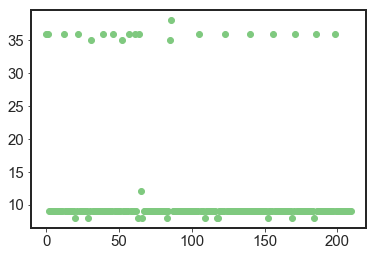

In [99]:
# to see if we have the same amount of measurements per position
measurements=[]
for i in range(len(ydata)):
    measurements.append(len(ydata[i]))
plt.scatter(range(len(ydata)),measurements)
print('The min amount of measurments is: ',min(measurements))
print('The max amount of measurments is: ',max(measurements))
print('total measurments:', sum(np.array(measurements)))

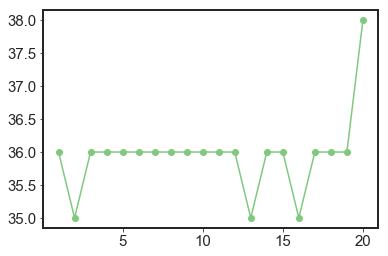

In [80]:
PosSingle=[]
MeasSingle=[]
for i in range(len(xdata)):
    if (len(xdata[i])==1):
        PosSingle.append(xdata[i])
        MeasSingle.append(len(ydata[i]))
MeasSingle_ordered=np.empty(len(PosSingle)+1)
for i in range(1,len(MeasSingle)+1):
    MeasSingle_ordered[PosSingle[i-1]]=MeasSingle[i-1]
plt.plot(range(1,21),np.array(MeasSingle_ordered[1:]),marker='o')
# So the deviation from WA from mean is not due to a difference in amount of measurements for those mismatch positions.

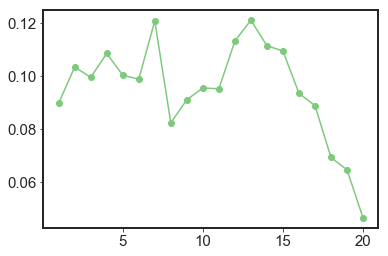

In [117]:
yav=[]
for i in range(len(yerr)):
    yav.append(np.mean(yerr[i]))
#plt.scatter(range(len(yav)),yav)

PosSingle=[]
YavSingle=[]
for i in range(len(xdata)):
    if (len(xdata[i])==1):
        PosSingle.append(xdata[i])
        YavSingle.append(yav[i])
YavSingle_ordered=np.empty(len(PosSingle)+1)
for i in range(1,len(YavSingle)+1):
    YavSingle_ordered[PosSingle[i-1]]=YavSingle[i-1]
plt.plot(range(1,21),np.array(YavSingle_ordered[1:]),marker='o')
# So the deviation from WA from mean is not due to the error, since the error goes actually down at the point where the WA deviates.

# Return to normal code

In [5]:
# Load Parameters to calculate the chi-squared for best fit
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

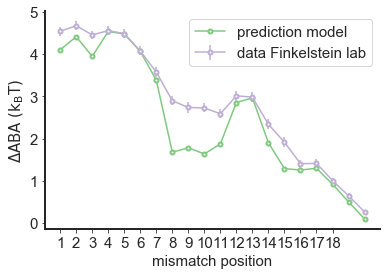

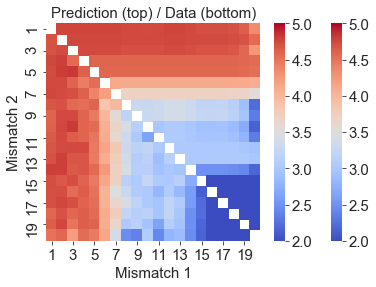

In [6]:
import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'general_energies_no_kPR'

plt.figure()
_ = pltABA.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)


plt.figure()
best_heatmap = pltABA.predict_double_mm_delta(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

# Cannot do those plots, because do not have block data
# plt.figure()
# _ = pltABA.predict_1D_mmblocks(Param_normal, model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
# plt.figure()
# _ = pltABA.predict_block_mismatches(Param_normal, model_id, T,guide_length, show_plot=True, show_data=True, data_file=rawABA)



# Now selection based on agreement with data

In [7]:
def select_on_prediction_WA(simset,
                            percentage=0.1,
                            Nparams=43,
                            model_id='general_energies_no_kPR',
                            path='../Data_Boyle/',
                            replica='1'):
    # in my case replica is filename!
    scores = []
    for sim in simset:
        #print sim
        parameters = getParm.load_simm_anneal(sim, Nparams)
        score, _, _ = predict_train(parameters, model_id=model_id, path=path, replica=replica, Plot=False)
        scores.append(score)
    scores = np.array(scores)
    simset = np.array(simset)
    selected_scores = scores[scores <= percentage]
    selected_sims = simset[scores <= percentage]
    return selected_sims, selected_scores, scores


import os
import numpy as np
import pandas as pd
import Boyle_data_processing as process
import CRISPR_dCas9_binding_curve_Boyle as dCas9
import matplotlib.pylab as plt
import Prepare_data as prep

import Calculate_ABA_Finkelsteinlab_Diewertje as ABA


# BASED ON ABA AVARAGE DATA AND PREDICTED ABA

def Weighted_average(row):
    y = np.array(row['ydata'])
    e = np.array(row['yerr'])
    wa=np.average(y, weights=e ** -2, axis=0)
    return wa


def calc_Weighted_average(path='../Data_Boyle/', replica='1', outputdirectory='../Data_Boyle/Weighted_Avarage/',
                          save=True):
    # For me replica is the filename
    xdata, ydata, yerr = prep.Prepare_Cdata(path=path,filename=replica)
    data = pd.DataFrame(columns=['xdata', 'ydata', 'yerr'])
    data['xdata'] = xdata
    data['ydata'] = ydata
    data['yerr'] = yerr
    wa = []
    for i in data.index:
        wa.append(Weighted_average(data.loc[i]))
    #data['WA'] = wa
    #data['WA'] = data.apply(Weighted_average, axis=1)

    WA = pd.DataFrame(columns=['MM_pos', 'WA_data'])
    WA.MM_pos = xdata
    WA.WA_data = wa
    return WA


def predict_train(parameters, model_id='general_energies_no_kPR', path='../Data_Boyle/', replica='1', Plot=True):
    wa = calc_Weighted_average(path=path, replica=replica, save=False)
    prediction=wa.copy()
    concentrations=np.array([0.1,0.3,1.,3.,10.,30.,100.,300.])
    reference=1
    prediction['WA_model']=wa['MM_pos'].apply(lambda x: ABA.calc_ABA(parameters,concentrations,reference,x.tolist(),model_id,guide_length=20,T=10*60))
    score = prediction.dropna().apply(lambda x: np.abs(x['WA_data'] - x['WA_model']) / x['WA_data'], axis=1).mean()
    corr=0
    return score, corr, prediction


In [19]:
# select based on dataset instead of best fit:
selected_sims, selected_scores, scores = select_on_prediction_WA(simset3,
                                                                        percentage=0.036,
                                                                        model_id='general_energies_no_kPR',
                                                                        path=path_to_data,
                                                                        replica='cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')
# replica is filename of the data in my case!

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


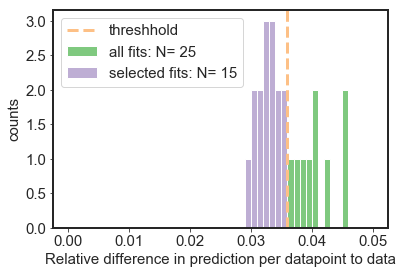

In [20]:
plt.hist(scores, normed=False, bins=np.arange(0,max(scores),0.001), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,max(scores),0.001), label='selected fits: N= ' +str(len(selected_scores)));

plt.axvline(0.036, linestyle='dashed', linewidth=3, color=sns.color_palette()[2], label='threshhold')


plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint to data', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);

# Plot of weighted average

In [21]:
percentage=0.1,
model_id='general_energies_no_kPR'
path=path_to_data
replica='cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv'


WA=calc_Weighted_average(path,replica,save=False)
WA['WA_data_delta']=WA['WA_data']#-2.5545002878227865 
# substract ontarget to go to delta ABA


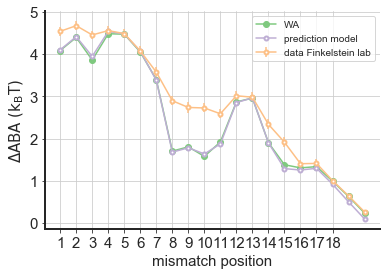

In [254]:
WAsingle=[]
singlePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==1):
        singlePos.append(WA['MM_pos'][i])
        WAsingle.append(WA['WA_data_delta'][i])

WAsingle_ordered=np.empty(len(WAsingle)+1)
for i in range(1,len(WAsingle)+1):
    WAsingle_ordered[singlePos[i-1]]=WAsingle[i-1]
len(WAsingle_ordered)
plt.figure()
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA')
delta1 = pltABA.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
plt.legend()
plt.grid()

In [248]:
def predict_single_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    

    delta_ABA = np.zeros(guide_length)
    for mm_pos in range(1, guide_length + 1):
        delta_ABA[mm_pos - 1] = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                                       mismatch_positions=[mm_pos],
                                                       model_id=model_id,
                                                       guide_length=guide_length,
                                                       T=T)

    if show_plot:
        ax = plt.plot(range(1, guide_length + 1),
                      delta_ABA,
                      marker='o',
                      markersize=4,
                      markerfacecolor='white',
                      markeredgewidth=2,
                      linestyle='solid',
                      label='prediction model')

        sns.despine()
        plt.xticks(range(1, 19), fontsize=15);
        plt.yticks(fontsize=15);
        plt.xlabel('mismatch position', fontsize=15);
        plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            single_mut_data_mean = plot_single_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)

            plt.errorbar(x=single_mut_data_mean['Position'],
                         y=single_mut_data_mean['Delta ABA (kBT)'],
                         yerr=single_mut_data_mean['Uncertainty'],
                         marker='o',
                         markersize=4,
                         markerfacecolor='white',
                         markeredgewidth=2,
                         linestyle='solid',
                         label='data Finkelstein lab')
            plt.legend(fontsize=15, loc='best')
    return delta_ABA

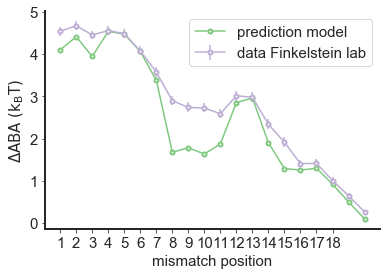

In [255]:
aba1 = predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

In [258]:
concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
reference_conc = 1 #10

ontarget_ABA = CalcABA.calc_ABA(Param_conc3, concentrations, reference=1,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
ontarget_ABA


-0.0013016798390930117

In [256]:
delta1-aba1

array([0.00130168, 0.00130168, 0.00130168, 0.00130168, 0.00130168,
       0.00130168, 0.00130168, 0.00130168, 0.00130168, 0.00130168,
       0.00130168, 0.00130168, 0.00130168, 0.00130168, 0.00130168,
       0.00130168, 0.00130168, 0.00130168, 0.00130168, 0.00130168])

Text(0.5, 1.0, 'Prediction (top) / WA (bottom)')

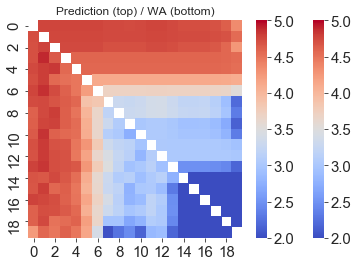

In [23]:
#-----For double mismatches-----
WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = pltABA.predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=2,vmax=5)
plt.title('Prediction (top) / WA (bottom)')

# To calculate the chisquared of WA compared to data

In [87]:
score,corr,prediction=predict_train(Param_conc3,
                                    model_id='general_energies_no_kPR',
                                    path=path,replica=replica,Plot=True)
prediction
parts=[]
for i in range(len(ydata)):
    parts.append(sum((np.array(ydata[i])-(prediction['WA_model'][i]*np.ones(len(ydata[i]))))**2/(np.array(yerr[i])**2)))
    
chi_squared_WA=sum(np.array(parts))

In [89]:
chi_squared_WA

66942.16112037186

In [136]:
np.abs(np.array(chi_squared)-chi_squared_WA)/chi_squared_WA

array([0.0017861 , 0.11118031, 0.05018384, 0.6182727 , 0.07302414,
       0.00549295, 0.03163201, 1.08136188, 0.01972656, 0.06427032,
       0.38689735, 0.04178487, 0.11266317, 0.05715894, 0.04304902,
       0.05762263, 0.0401525 , 0.03302182, 0.02502822, 0.01267543,
       0.01608059, 0.02360656, 0.04932639, 1.49502116])

# FROM NOW IT IS NORMAL CODE AGAIN

In [24]:
# --- make selection --- 
simset3 = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

PAM    3.500000
1     -4.133199
2     -0.333627
3      2.707365
4     -3.052799
5      4.460815
6      0.323544
7      0.099028
8     -4.711726
9      5.129223
10    -4.345994
11     1.593814
12    -1.732012
13     5.345861
14     1.470462
15    -1.404613
16    -0.428703
17     1.614852
18     1.348322
19     1.351988
20     0.775417
Name: ../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_18.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


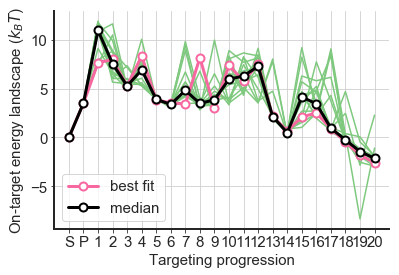

In [25]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    #plt.figure()
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


In [263]:
-np.log(np.sum(np.exp(landscape.loc[best_fit_conc3])))


-9.713117510130374

In [264]:
np.exp(ontarget_ABA)

0.9986991669786404

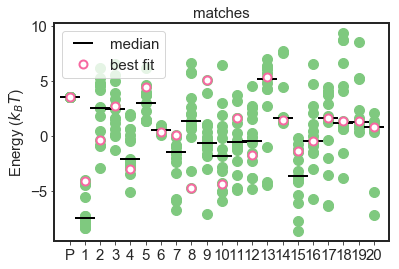

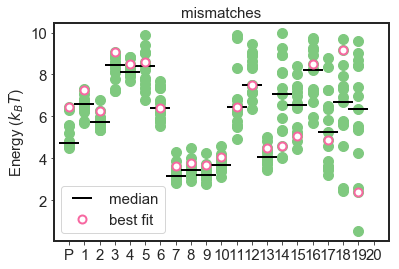

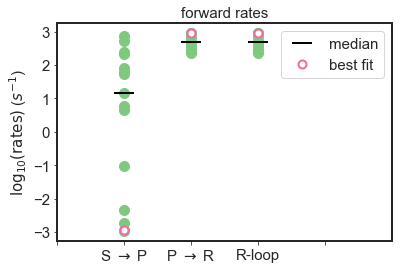

In [26]:
# ---- show fluctuations in parameter sets --- 
# THIS IS THE RESULT

# --- Matches ---
# MAYBE WE WANT TO NEGATE (multiply by -1 all the epsilonC to have the same sign convention as EpsilonPAM and EpsilonI)
plt.figure()
for sim in simset3:
    matches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

matches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    

matches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('matches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);

# --- Mismatches --- 
plt.figure()
for sim in simset3:
    mismatches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

mismatches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    

mismatches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('mismatches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);


# --- 10log of the forward rates --- 
plt.figure()
for sim in simset3:
    forward_rates.loc[sim].apply(np.log10).plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

forward_rates.median().apply(np.log10).plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    
    

forward_rates.loc[best_fit_conc3].apply(np.log10).plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('forward rates',fontsize=15)
plt.xticks(range(-1,4),['',r'S $\rightarrow$ P',r'P $\rightarrow$ R','R-loop',''],fontsize=15);
plt.xlim(-1,4);
plt.yticks(fontsize=15);
plt.ylabel(r'$\log_{10}(\rm{rates})$ ($s^{-1}$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);




In [32]:
forward_rates['PAM_to_R1'].mean()

565.4229405109046

In [33]:
forward_rates.loc[best_fit_conc3]

sol_to_PAM      0.001193
PAM_to_R1     898.870983
internal      898.870983
Name: ../Diewertje/19_5_2019_cas12_conc3/fit_19_5_2019_cas12_conc3_sim_18.txt, dtype: float64

In [196]:
def plot_single_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):

    Mut_names = {'r':'Mismatch', 'i':'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]
    
    data['Mutation Type'].fillna('', inplace=True)
    single_mut_data = data[(data['Canonical']==Canonical)&(data['Mutation Type']==Mut_type)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    single_mut_data['Position'] = single_mut_data['Mutation ID'].apply(lambda x: int(x.split(':')[1]))
    single_mut_data_mean = single_mut_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()
    
    if Plot:
        single_mut_data_mean.plot(x='Position', y='Delta ABA (kBT)',yerr='Uncertainty', marker='o', linewidth=1, color='blue') 
        plt.xlabel(Mut_name+' postion', fontsize=15)
        plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name + ' - Noncanonical',fontsize=15)
    
    return single_mut_data_mean

def plot_double_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    Mut_names = {'r':'Mismatch', 'i':'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]
    Mut_type_str = Mut_type+'|'+Mut_type
    
    data['Mutation Type'].fillna('', inplace=True)
    double_mut_data = data[(data['Canonical']==Canonical)&(data['Mutation Type']==Mut_type_str)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    double_mut_data['Position'] = double_mut_data['Mutation ID'].apply(lambda x: '|'.join(map(lambda y: y.split(':')[1], x.split('|'))))
    double_mut_data_mean = double_mut_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()

    Ng = 20;
    double_mut_map = np.empty((Ng,Ng))
    double_mut_map[:] = np.nan
    for n in range(len(double_mut_data_mean)):
        pos = double_mut_data_mean['Position'].iloc[n]
        Positions = list(map(lambda x: int(x)-1, pos.split('|')))
        double_mut_map[Positions[1],Positions[0]] = double_mut_data_mean['Delta ABA (kBT)'].iloc[n]
        
    if Plot:    
        plt.figure()
        sns.heatmap(double_mut_map, cmap='coolwarm',cbar=True,vmin=0,vmax=double_mut_data_mean['Delta ABA (kBT)'].max())
        plt.xlabel(Mut_name+' 1', fontsize=15)
        plt.ylabel(Mut_name+' 2', fontsize=15)
        plt.title('$\Delta$ABA - '+data_name,fontsize=15)
        if not Canonical:
            plt.title('$\Delta$ABA - '+data_name+' - Noncanonical',fontsize=15)
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)),ax.get_xticks()+0.5)));
        ax.set_yticklabels(list(map(lambda x: str(int(x)),ax.get_yticks()+0.5)));
    
    return double_mut_data_mean, double_mut_map

def make_block_ID(MM_pos_list):
    
    bi = MM_pos_list[0]
    bf = MM_pos_list[-1]
    block = np.arange(bi,bf+1)
    if (len(block)!=len(MM_pos_list)) or np.any(block!=np.array(MM_pos_list)):
        return ''
    return '|'.join(list(map(str, [bi, bf])))

def plot_block_mm_ABA(data, data_name='Finkelstein Data', Canonical=True, Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    select_multi_mm = data['Mutation Type'].apply(lambda x: np.unique(np.array(x.split('|')))[0]=='r')
    multi_mm_data = data[(data['Canonical']==Canonical)&(select_multi_mm)&(data['Mutation Count']>2)][['Mutation ID', 'Delta ABA (kBT)', 'Uncertainty']]
    multi_mm_data['MM Positions'] = multi_mm_data['Mutation ID'].apply(lambda x: list(map(lambda y: int(y.split(':')[1]), x.split('|'))))
    multi_mm_data['Position'] = multi_mm_data['MM Positions'].apply(make_block_ID)
    multi_mm_data = multi_mm_data[(multi_mm_data['Position']!='')]
    block_mm_data_mean = multi_mm_data[['Position', 'Delta ABA (kBT)', 'Uncertainty']].groupby('Position').mean().reset_index()

    Ng = 20;
    block_mm_map = np.empty((Ng,Ng))
    block_mm_map[:] = np.nan
    for n in range(len(block_mm_data_mean)):
        pos = block_mm_data_mean['Position'].iloc[n]
        Positions = list(map(lambda x: int(x)-1, pos.split('|')))
        block_mm_map[Positions[0],Positions[1]] = block_mm_data_mean['Delta ABA (kBT)'].iloc[n]

    if Plot:
        plt.figure()
        sns.heatmap(block_mm_map, cmap='coolwarm',cbar=True,vmin=2,vmax=5) #=block_mm_data_mean['Delta ABA (kBT)'].max())
        #plt.xlabel('Block end', fontsize=15)
        #plt.ylabel('Block start', fontsize=15)
        plt.title('$\Delta$ABA - '+data_name,fontsize=15)
        if not Canonical:
            plt.title('$\Delta$ABA - '+data_name+' - Noncanonical',fontsize=15)
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)),ax.get_xticks()+0.5)));
        ax.set_yticklabels(list(map(lambda x: str(int(x)),ax.get_yticks()+0.5)));
    
    block_start_mm_data = block_mm_data_mean.set_index('Position').groupby(lambda x: int(x.split('|')[0])).mean().reset_index().rename(columns={'index':'Block start'})
    
    if Plot:
        block_start_mm_data.plot(x='Block start', y='Delta ABA (kBT)',yerr='Uncertainty', marker='o', linewidth=1, color='blue') 
        #plt.xlabel('Block start', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
        if not Canonical:
            plt.title(data_name+' - Noncanonical',fontsize=15)
    
    return block_mm_data_mean, block_mm_map, block_start_mm_data

def plot_mut_PAM_ABA(data, data_name='Finkelstein Data', Plot=True):
    
    data['Mutation Type'].fillna('', inplace=True)
    data['Alignment'].fillna('', inplace=True)
    NonCanonical = data[(data['Canonical']==False)&(data['Alignment']!='')&(data['Mutation Type']=='')][['PAM', 'Delta ABA (kBT)', 'Uncertainty']].groupby('PAM').mean()
    
    if Plot:
        bar_width = 0.35
        plt.figure(figsize=(20,6))
        plt.bar(np.arange(len(NonCanonical)), NonCanonical['Delta ABA (kBT)'], width=bar_width)
        ax = plt.gca()
        ax.set_xticks(np.arange(len(NonCanonical))+0.5*bar_width);
        ax.set_xticklabels(NonCanonical.index, rotation='vertical');
        #plt.xlabel('PAM', fontsize=15)
        #plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name,fontsize=15)
    
    return NonCanonical

20


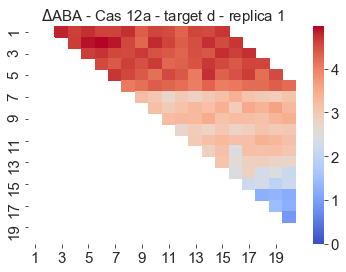

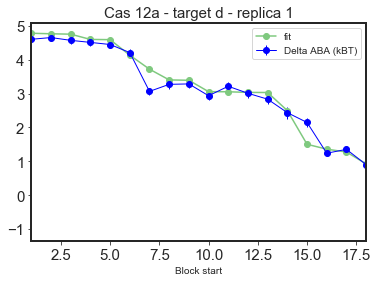

In [30]:
# epsC=np.array(Param_conc3[:21]).copy()
# epsC[1:] *= -1
# epsI=Param_conc3[21:41]
# epsI=[0]+epsI
# epsI=np.array(epsI)
# print(epsI)
# energy_block=[]
# for i in range(1,len(epsI)):
#     energy_block.append(np.log(sum(np.exp(epsC+epsI)))
#     epsI[i]=0
#plt.plot(range(0,21),np.cumsum(epsC),marker='o',label='Best Fit')
energy_block=[]
epsilon = Param_conc3[:-2]
for mmStart in range(1,21):
    block=np.arange(mmStart,21)
    energies=ABA.get_energies(epsilon,block, guide_length)
    energy_block.append(-np.log(np.sum(np.exp(-np.cumsum(energies)))))
print(len(energy_block))   

#plt.xlabel('Start mismatch block')

Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename_3 = 'cas12a-target-d-replicate-1-delta-abas-processed.csv'
data_cas12a_d1 = pd.read_csv(Path+filename_3)
_, block_cas12a_d, block_start_cas12_d2 = plot_block_mm_ABA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=True)
plt.plot(range(1,21),energy_block,marker='o',label='fit')
plt.legend()

# See which part of the landscape are important

In [184]:
param_play=Param_conc3.copy()
Param_conc3[16]+Param_conc3[17]

1.186148972489

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


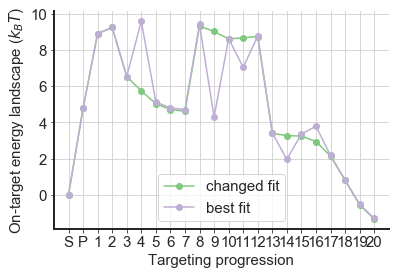

In [223]:
param_play=Param_conc3.copy()

# to get rid of peak around 3
# param_play[3]=-0.3
# param_play[4]=-0.1

# to get rid of peak around 4
param_play[4]=0.8
param_play[5]=0.7

# move 5 and 6 up
# store=param_play[5]
# param_play[5]=param_play[7]
# param_play[7]=store

# move 5,6,7 up
# param_play[5]=0
# param_play[8]=-0.2

# to get rid of peak around 8
# param_play[8]=0.2
# param_play[9]=0.2175

# to move 9 up
param_play[9]=0.3
param_play[10]=0.4175

# to get rid of peak around 11
param_play[11]=-0.07
param_play[12]=-0.0681985

# to get rid of peak around 14
param_play[14]=0.13
param_play[15]=0.025849

# move 16 down
param_play[16]=0.3
param_play[17]=0.8

# --- (microscopic) free-energy landscape --- 
plt.figure()
#parameters[0]=3.5 # if want to fix epsilon PAM
Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(param_play,model_id=model_id,show_plot=False);
#plt.figure()
Energy_landscape_b, FreeEnergy_landscape_b = FreeEnergy.plot_free_energy_landscape(Param_conc3,model_id=model_id,show_plot=False);

plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0],marker='o',label='changed fit')
plt.plot(np.array(Energy_landscape_b),color=sns.color_palette()[1],marker='o',label='best fit')

# LandscapeMED = landscape[landscape.columns[:]].median()
# plt.plot(np.array(LandscapeMED),color='black' , 
#          marker='o',
#          lw=3,
#          markersize =8,
#          markerfacecolor='white',
#          markeredgewidth= 2,
#          label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


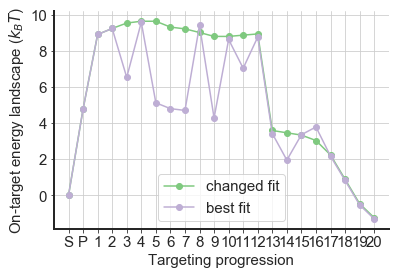

In [222]:
param_play=Param_conc3.copy()

# to get rid of peak around 3
param_play[3]=-0.3
param_play[4]=-0.1

# to get rid of peak around 8
param_play[8]=0.2
param_play[9]=0.2175

# to get rid of peak around 11
param_play[11]=-0.07
param_play[12]=-0.0681985

# to get rid of peak around 14
param_play[14]=0.13
param_play[15]=0.125849

# move 16 down
param_play[16]=0.3
param_play[17]=0.8

# move everything up
param_play[5]=0
param_play[10]=0

# --- (microscopic) free-energy landscape --- 
plt.figure()
#parameters[0]=3.5 # if want to fix epsilon PAM
Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(param_play,model_id=model_id,show_plot=False);
#plt.figure()
Energy_landscape_b, FreeEnergy_landscape_b = FreeEnergy.plot_free_energy_landscape(Param_conc3,model_id=model_id,show_plot=False);

plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0],marker='o',label='changed fit')
plt.plot(np.array(Energy_landscape_b),color=sns.color_palette()[1],marker='o',label='best fit')

# LandscapeMED = landscape[landscape.columns[:]].median()
# plt.plot(np.array(LandscapeMED),color='black' , 
#          marker='o',
#          lw=3,
#          markersize =8,
#          markerfacecolor='white',
#          markeredgewidth= 2,
#          label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


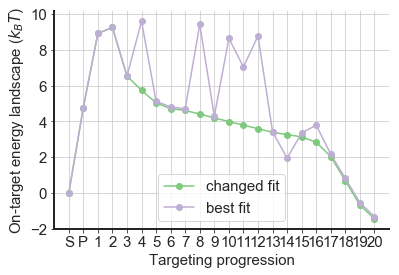

In [230]:
param_play=Param_conc3.copy()

# to get rid of peak around 4
param_play[4]=0.8
param_play[5]=0.7

# to get rid of peak around 8
param_play[8]=0.2
param_play[9]=0.2175

# to get rid of peak around 11
param_play[11]=-0.07
param_play[12]=-0.0681985

# to get rid of peak around 14
param_play[14]=0.13
param_play[15]=0.125849

# move 16 down
param_play[16]=0.3
param_play[17]=0.8

# move 10, 11,12 down
param_play[10]=0.2
param_play[11]=0.2
param_play[12]=0.2
param_play[13]=0.2


# --- (microscopic) free-energy landscape --- 
plt.figure()
#parameters[0]=3.5 # if want to fix epsilon PAM
Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(param_play,model_id=model_id,show_plot=False);
#plt.figure()
Energy_landscape_b, FreeEnergy_landscape_b = FreeEnergy.plot_free_energy_landscape(Param_conc3,model_id=model_id,show_plot=False);

plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0],marker='o',label='changed fit')
plt.plot(np.array(Energy_landscape_b),color=sns.color_palette()[1],marker='o',label='best fit')

# LandscapeMED = landscape[landscape.columns[:]].median()
# plt.plot(np.array(LandscapeMED),color='black' , 
#          marker='o',
#          lw=3,
#          markersize =8,
#          markerfacecolor='white',
#          markeredgewidth= 2,
#          label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();

In [231]:
score_b, _, _ = predict_train(Param_conc3, model_id=model_id, path=path, replica=replica, Plot=False)
print("The score with the best fitted parameters is: ",score_b)
score, _, _ = predict_train(param_play, model_id=model_id, path=path, replica=replica, Plot=False)
print("The score with these parameters is: ",score)

The score with the best fitted parameters is:  0.02966504597665517
The score with these parameters is:  0.08466804148628572


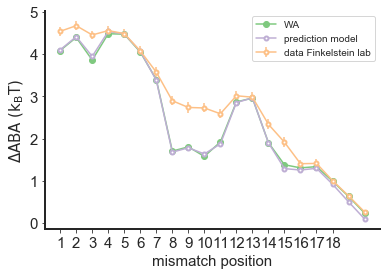

In [235]:
percentage=0.1,
model_id='general_energies_no_kPR'
path=path_to_data
replica='cas12a-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv'


WA=calc_Weighted_average(path,replica,save=False)
WA['WA_data_delta']=WA['WA_data']#-2.5545002878227865 
# substract ontarget to go to delta ABA

WAsingle=[]
singlePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==1):
        singlePos.append(WA['MM_pos'][i])
        WAsingle.append(WA['WA_data_delta'][i])

WAsingle_ordered=np.empty(len(WAsingle)+1)
for i in range(1,len(WAsingle)+1):
    WAsingle_ordered[singlePos[i-1]]=WAsingle[i-1]
len(WAsingle_ordered)
plt.figure()
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA')
#_ = pltABA.predict_single_mm(param_play,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
_ = pltABA.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

plt.legend()

Text(0.5, 1.0, 'Prediction (top) / WA (bottom)')

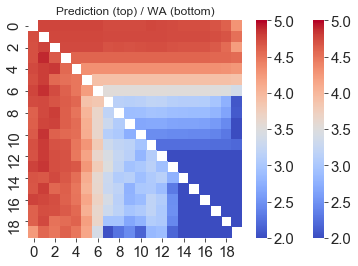

In [233]:
#-----For double mismatches-----
WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = pltABA.predict_double_mm(param_play,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=2,vmax=5)
plt.title('Prediction (top) / WA (bottom)')

20


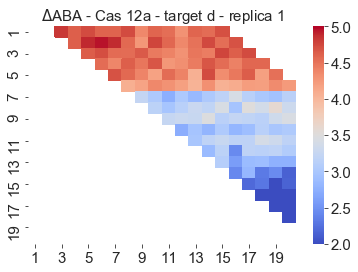

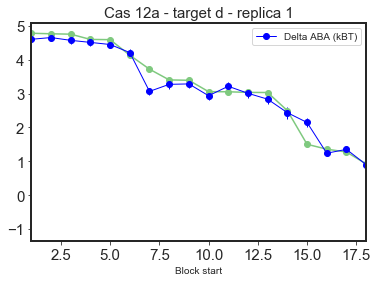

In [236]:
energy_block=[]
epsilon = Param_conc3[:-2]
for mmStart in range(1,21):
    block=np.arange(mmStart,21)
    energies=ABA.get_energies(epsilon,block, guide_length)
    energy_block.append(-np.log(np.sum(np.exp(-np.cumsum(energies)))))
print(len(energy_block))   

#plt.xlabel('Start mismatch block')

Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename_3 = 'cas12a-target-d-replicate-1-delta-abas-processed.csv'
data_cas12a_d1 = pd.read_csv(Path+filename_3)
_, block_cas12a_d, block_start_cas12_d2 = plot_block_mm_ABA(data_cas12a_d1, data_name='Cas 12a - target d - replica 1', Canonical=True, Plot=True)
plt.plot(range(1,21),energy_block,marker='o')

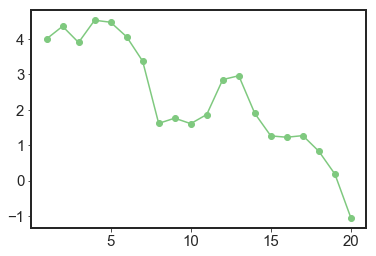

In [240]:
epsilon = Param_conc3[:-2]
PosSingle=[]
epsSingle=[]
for i in range(len(xdata)):
    if (len(xdata[i])==1):
        PosSingle.append(xdata[i])
        energies=ABA.get_energies(epsilon,xdata[i], guide_length)
        mABA=-np.log(np.sum(np.exp(-np.cumsum(energies))))
        epsSingle.append(mABA)
epsSingle_ordered=np.empty(len(PosSingle)+1)
for i in range(1,len(epsSingle)+1):
    epsSingle_ordered[PosSingle[i-1]]=epsSingle[i-1]
plt.plot(range(1,21),np.array(epsSingle_ordered[1:]),marker='o')


In [ ]:
epsilon = Param_conc3[:-2]
PosSingle=[]
epsSingle=[]
for i in range(len(xdata)):
    if (len(xdata[i])==1):
        PosSingle.append(xdata[i])
        energies=ABA.get_energies(epsilon,xdata[i], guide_length)
        mABA=-np.log(np.sum(np.exp(-np.cumsum(energies))))
        epsSingle.append(mABA)
epsSingle_ordered=np.empty(len(PosSingle)+1)
for i in range(1,len(epsSingle)+1):
    epsSingle_ordered[PosSingle[i-1]]=epsSingle[i-1]
plt.plot(range(1,21),np.array(epsSingle_ordered[1:]),marker='o')


In [145]:
param_med=[]
for i in range(1,len(LandscapeMED)):
    param_med.append(LandscapeMED.tolist()[i]-LandscapeMED.tolist()[i-1])
param_med=param_med+Param_conc3[21:]

score_m,_,_ = predict_train(param_med,model_id=model_id, path=path, replica=replica, Plot=False)
print( "The score of the median is: ",score_m)

The score of the median is:  1.00711890590435
